### Capstone Project Home Credit Default Risk



## Overview :

There are lots of people who do not particularly have a prior credit history, for example students, small businessmen, etc. who need credits, be it for studies, or for setting up some sort of businesses. Without adequate credit history, the lending organizations find it difficult to lend credits to such people, as these loans could be associated with high risks. In these kinds of situations, some lending organizations even tend to exploit the borrowers by asking for too high of an interest rate.<br>
There are another subset of people, who do have prior credit history, which could be with the same organization or some other organizations. However, going through that historical data could be very time consuming and redundant. This would scale up even further as the number of applicants increases.<br>
For such cases, if there could be a way through which the lending organization could predict or estimate the borrower’s repayment capability, the process could be streamlined and be made effective for both the lender and the borrower. It could save resources both in terms of humans and time.<br>
So the main two questions that the lender needs answer to are:<br>
1) How risky is the borrower?<br>
2) Given the borrower’s risk, should we give him/her loan?<br>



#### Business Objective: Home Credit Default Risk
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.<br>
 
Home depot wants to have a model that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.<br>


## Data:

Data for this project is from a Kaggle competition. Description of the data is below:<br>


<b>application_{train|test}.csv</b><br>

- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).<br>
- Static data for all applications. One row represents one loan in our data sample.<br>

<b>bureau.csv</b><br>

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).<br>
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.<br>

<b>bureau_balance.csv</b><br>

- Monthly balances of previous credits in Credit Bureau.<br>
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.<br>


<b>POS_CASH_balance.csv</b><br>

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.<br>

<b>credit_card_balance.csv</b><br>

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.<br>
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.<br>

<b>previous_application.csv</b><br>

- All previous applications for Home Credit loans of clients who have loans in our sample.<br>
- There is one row for each previous application related to loans in our data sample.<br>

<b>installments_payments.csv</b><br>

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.<br>
- There is a) one row for every payment that was made plus b) one row each for missed payment.<br>
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.<br>

<b>HomeCredit_columns_description.csv</b><br>

- This file contains descriptions for the columns in the various data files.

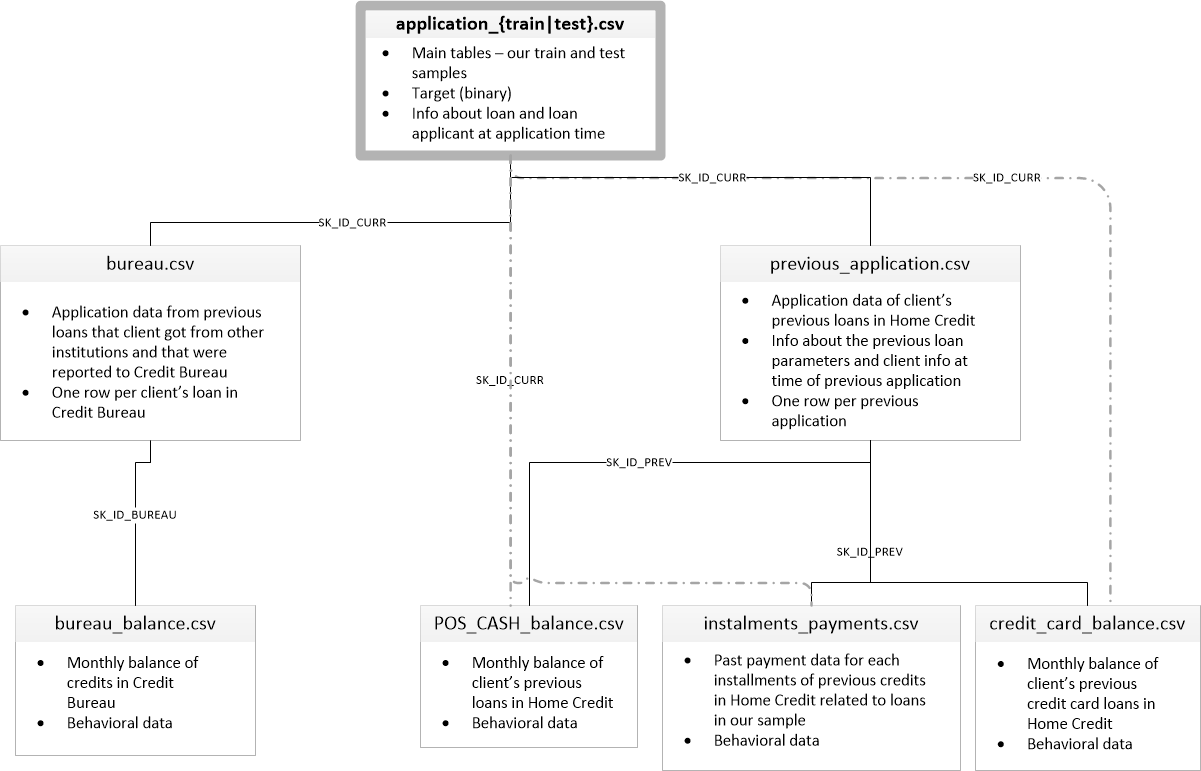

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
train = pd.read_csv( 'application_train.csv')
test = pd.read_csv('application_test.csv')
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
print('Training set shape:', train.shape)
print('Test set shape:    ', test.shape)

Training set shape: (307511, 122)
Test set shape:     (48744, 121)


In [6]:
train.TARGET.value_counts() / len(train)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64